# Random Forest Classification

In [123]:
# Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import glob
from pathlib import Path
import pyarrow as pa
import pyarrow.parquet as pq
import dask.dataframe as ddf
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import category_encoders as ce

## Read Datasets

In [124]:
df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')
df_day_minus_1 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_1.csv')
df_day_minus_2 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_2.csv')
df_day_minus_7 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_7.csv')

C:\Users\ali_m\AppData\Local\Temp\ipykernel_37016\2795191405.py:1: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_day_minus_0 = pd.read_csv('C:/com748/code/com748/data/processed/balanced_dataset/day_minus_0.csv')


Split into x and y

In [125]:
X_0 = df_day_minus_0.drop(columns=['failure', 'date', 'serial_number', 'file_date'], axis=1)
X_1 = df_day_minus_1.drop(columns=['failure', 'date', 'serial_number'], axis=1)
X_2 = df_day_minus_2.drop(columns=['failure', 'date', 'serial_number'], axis=1)
X_7 = df_day_minus_7.drop(columns=['failure', 'date', 'serial_number'], axis=1)

Y_0 = df_day_minus_0['failure']
Y_1 = df_day_minus_1['failure']
Y_2 = df_day_minus_2['failure']
Y_7 = df_day_minus_7['failure']


Split into test and training

In [126]:
encoder_0 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_1 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_2 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])
encoder_7 = ce.OrdinalEncoder(cols=['model', 'capacity_bytes'])

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, Y_0, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, Y_7, test_size=0.2, random_state=42)

X_train_0 = encoder_0.fit_transform(X_train_0)
X_test_0 = encoder_0.transform(X_test_0)

X_train_1 = encoder_1.fit_transform(X_train_1)
X_test_1 = encoder_1.transform(X_test_1)

X_train_2 = encoder_2.fit_transform(X_train_2)
X_test_2 = encoder_2.transform(X_test_2)

X_train_7 = encoder_0.fit_transform(X_train_7)
X_test_7 = encoder_0.transform(X_test_7)

Day minus 0

In [127]:
# Hyperparameter Tuning

# Define the parameter grid
param_grid = {
    "n_estimators": [5, 10, 50, 100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10, 15, 30] 
    }

# Create the random forest model
rf_model_0_cv = RandomForestClassifier(random_state=42)

# Perform grid search for hyperparameter tuning
grid_search_0 = GridSearchCV(rf_model_0_cv, param_grid, cv=5)
grid_search_0.fit(X_train_0, y_train_0)

# Get the best hyperparameters
best_n_estimators_0 = grid_search_0.best_params_["n_estimators"]
best_max_depth_0 = grid_search_0.best_params_["max_depth"]
print(grid_search_0.best_params_)

df_gridsearch_results_0 = pd.DataFrame(grid_search_0.cv_results_)

{'max_depth': 15, 'n_estimators': 300}


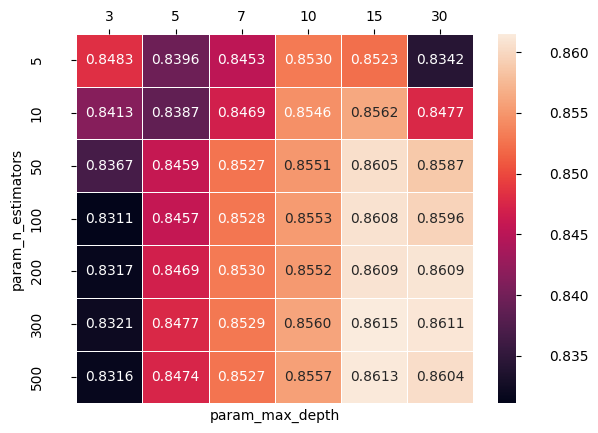

In [128]:
df_results_0 = df_gridsearch_results_0[['mean_test_score', 'param_n_estimators', 'param_max_depth']]
heatmap = sns.heatmap(data=df_results_0.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score'), annot=True, linewidth=.5, fmt=".4f")
heatmap.xaxis.tick_top()

[[2599  110]
 [ 643 2122]]
Test Accuracy: 0.8624406284252831
smart_10_raw            0.000000
smart_10_normalized     0.000000
smart_12_normalized     0.000000
smart_199_normalized    0.000000
smart_241_normalized    0.000000
smart_242_normalized    0.000000
smart_3_raw             0.000004
smart_240_normalized    0.000012
smart_192_normalized    0.000014
smart_188_normalized    0.000039
smart_4_normalized      0.000062
capacity_bytes          0.003835
smart_199_raw           0.005296
model                   0.006794
smart_3_normalized      0.006810
smart_197_normalized    0.007140
smart_190_normalized    0.007890
smart_194_normalized    0.007916
smart_190_raw           0.008324
smart_198_normalized    0.008648
smart_7_normalized      0.008898
smart_194_raw           0.009028
smart_188_raw           0.009374
smart_193_normalized    0.011042
smart_12_raw            0.011895
smart_1_raw             0.012551
smart_4_raw             0.012822
smart_9_normalized      0.013298
smart_1_normali

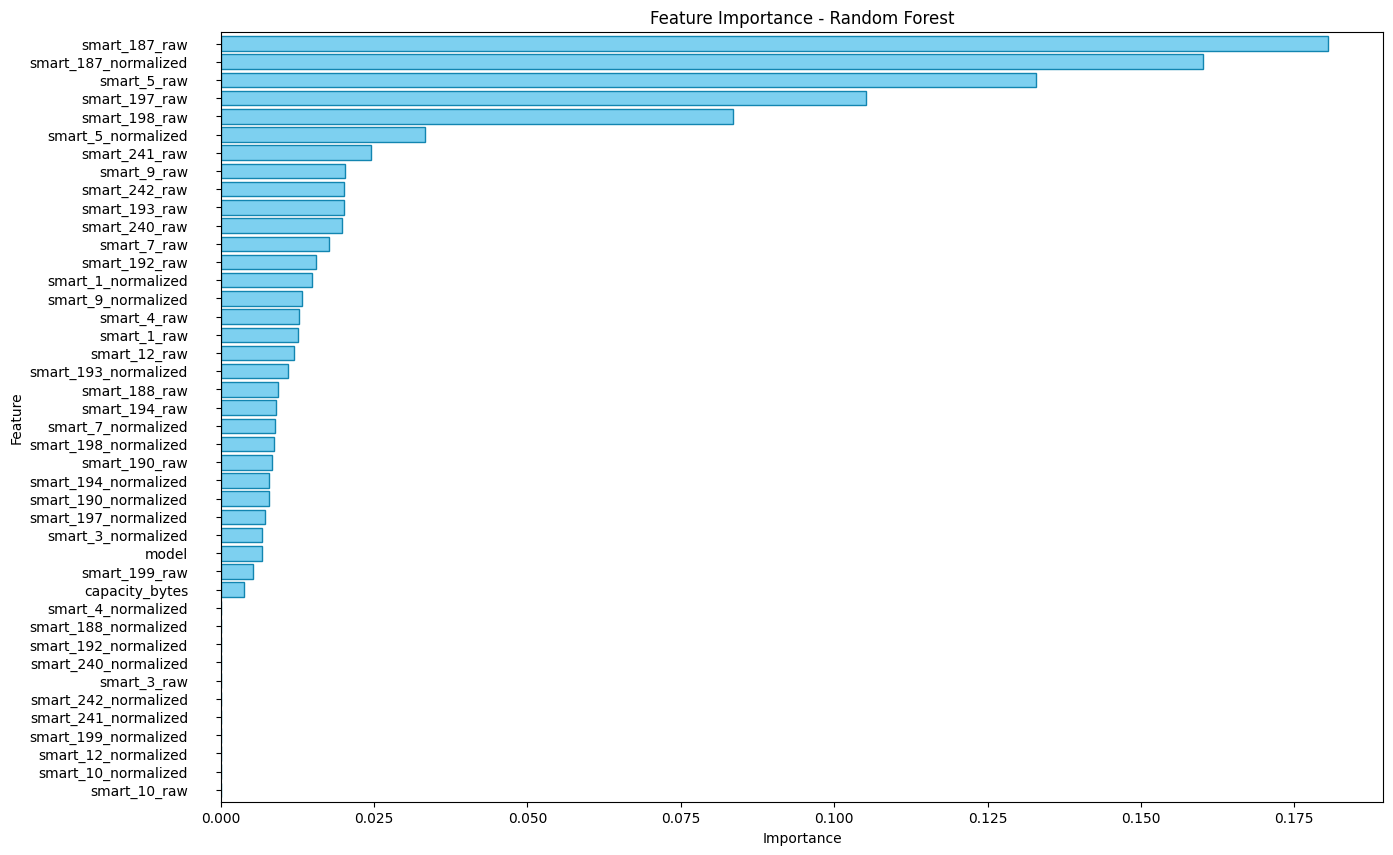

In [142]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Train the random forest model
rf_model_0 = RandomForestClassifier(n_estimators=best_n_estimators_0, max_depth=best_max_depth_0, random_state=42)
rf_model_0.fit(X_train_0, y_train_0)

test_predictions_0 = rf_model_0.predict(X_test_0)
cm = confusion_matrix(y_true=y_test_0, y_pred=test_predictions_0)
print(cm)

# Evaluate the model on test set
test_accuracy_0 = rf_model_0.score(X_test_0, y_test_0)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_0)

plt.figure(figsize=(15,10))

feature_importances = pd.Series(rf_model_0.feature_importances_, index=X_train_0.columns)
feature_importances.sort_values(ascending=True, inplace=True)
fig = feature_importances.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

print(feature_importances)

0.9246911874356258


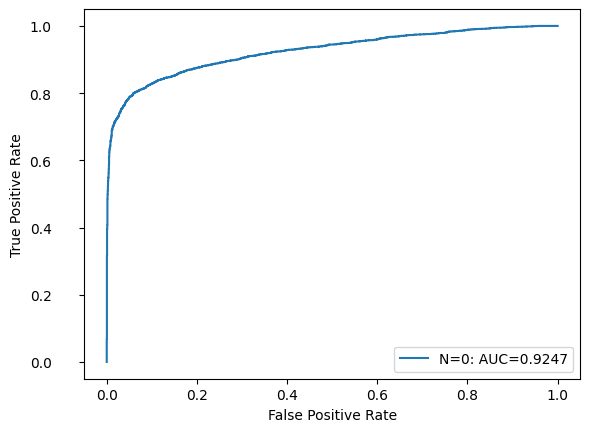

In [139]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_0, tpr_0, _ = roc_curve(y_test_0, rf_model_0.predict_proba(X_test_0)[:,1])
auc_0 = round(roc_auc_score(y_test_0, rf_model_0.predict_proba(X_test_0)[:,1]), 4)
plt.plot(fpr_0,tpr_0,label="N=0: AUC="+str(auc_0))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_0 = roc_auc_score(y_true=y_test_0, y_score=rf_model_0.predict_proba(X_test_0)[:,1])
print(auroc_score_0)


Day minus 1

[[2497  138]
 [ 712 2008]]
Test Accuracy: 0.8412698412698413
smart_3_raw             0.000000
smart_10_normalized     0.000000
smart_10_raw            0.000000
smart_12_normalized     0.000000
smart_242_normalized    0.000000
smart_241_normalized    0.000000
smart_240_normalized    0.000000
smart_199_normalized    0.000000
smart_192_normalized    0.000005
smart_188_normalized    0.000007
smart_4_normalized      0.000045
smart_199_raw           0.004269
capacity_bytes          0.004683
smart_198_normalized    0.005730
smart_197_normalized    0.005753
model                   0.007873
smart_188_raw           0.008542
smart_3_normalized      0.008657
smart_190_raw           0.009172
smart_190_normalized    0.009244
smart_194_normalized    0.009481
smart_194_raw           0.009673
smart_7_normalized      0.010910
smart_193_normalized    0.013881
smart_12_raw            0.014251
smart_9_normalized      0.014281
smart_4_raw             0.015226
smart_1_raw             0.015269
smart_1_normali

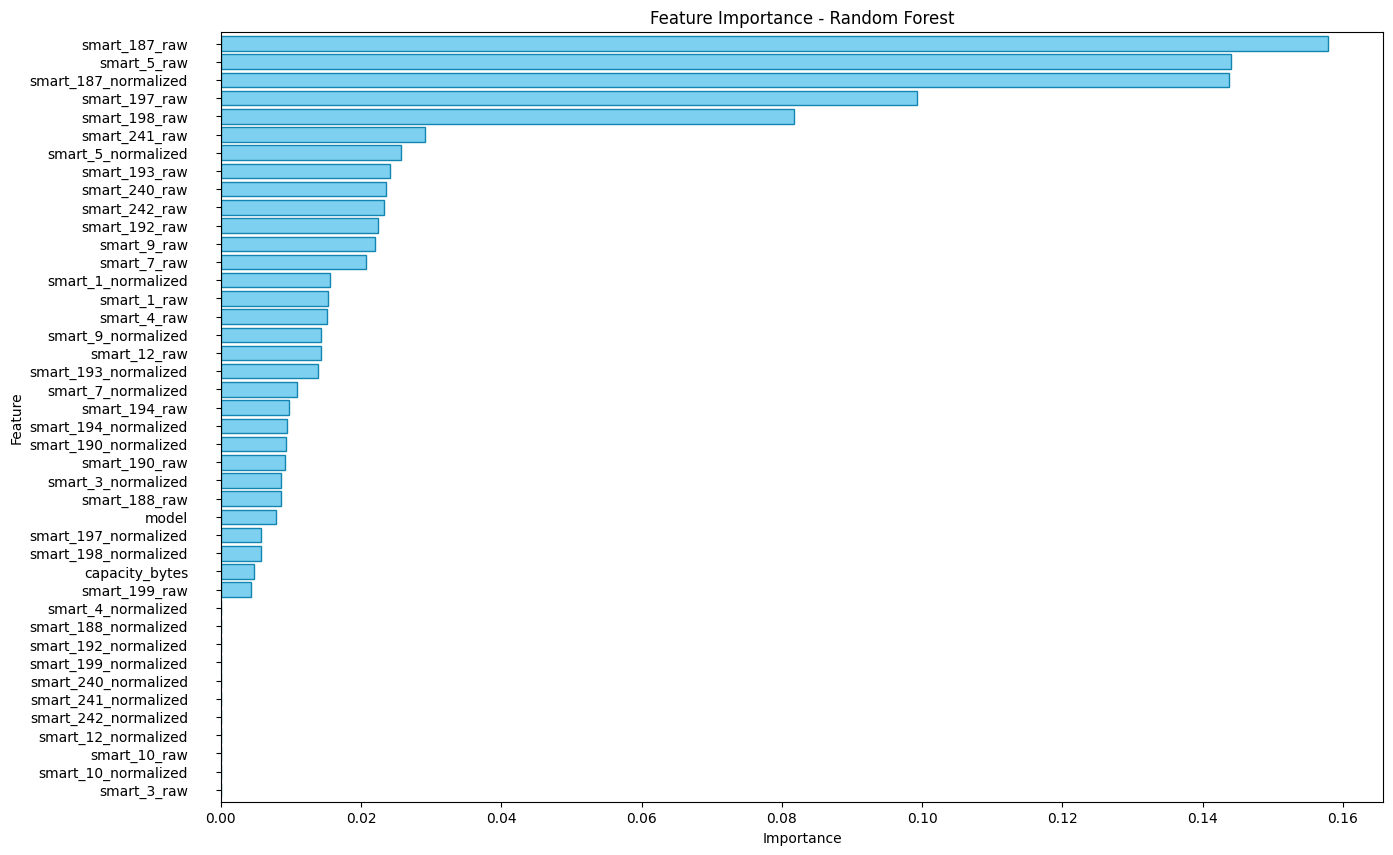

In [141]:
# Train the random forest model
rf_model_1 = RandomForestClassifier(n_estimators=best_n_estimators_0, max_depth=best_max_depth_0, random_state=42)
rf_model_1.fit(X_train_1, y_train_1)

test_predictions_1 = rf_model_1.predict(X_test_1)
cm = confusion_matrix(y_true=y_test_1, y_pred=test_predictions_1)
print(cm)

# Evaluate the model on test set
test_accuracy_1 = rf_model_1.score(X_test_1, y_test_1)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_1)

plt.figure(figsize=(15,10))

feature_importances_1 = pd.Series(rf_model_1.feature_importances_, index=X_train_1.columns)
feature_importances_1.sort_values(ascending=True, inplace=True)
fig = feature_importances_1.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

print(feature_importances_1)

0.9066860140640697


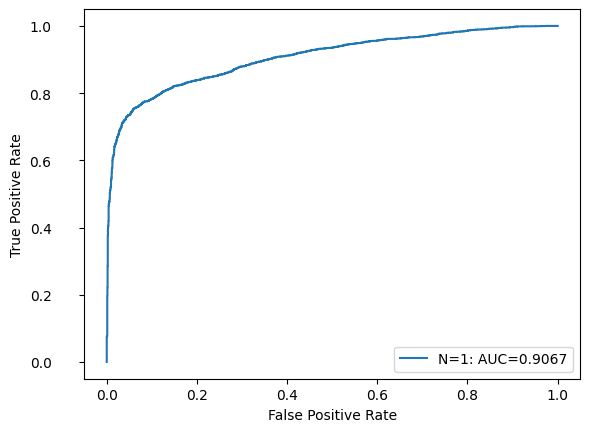

In [143]:
fpr_1, tpr_1, _ = roc_curve(y_test_1, rf_model_1.predict_proba(X_test_1)[:,1])
auc_1 = round(roc_auc_score(y_test_1, rf_model_1.predict_proba(X_test_1)[:,1]), 4)
plt.plot(fpr_1,tpr_1,label="N=1: AUC="+str(auc_1))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_1 = roc_auc_score(y_true=y_test_1, y_score=rf_model_1.predict_proba(X_test_1)[:,1])
print(auroc_score_1)

Day minus 2

[[2494  161]
 [ 790 1905]]
Test Accuracy: 0.8222429906542056
smart_3_raw             0.000000e+00
smart_10_raw            0.000000e+00
smart_12_normalized     0.000000e+00
smart_199_normalized    0.000000e+00
smart_242_normalized    0.000000e+00
smart_241_normalized    0.000000e+00
smart_240_normalized    0.000000e+00
smart_188_normalized    1.824076e-07
smart_10_normalized     6.224447e-06
smart_192_normalized    1.180683e-05
smart_4_normalized      6.593347e-05
smart_197_normalized    4.066232e-03
smart_198_normalized    4.326004e-03
smart_199_raw           4.969455e-03
capacity_bytes          5.320314e-03
smart_188_raw           8.289194e-03
smart_3_normalized      9.036592e-03
model                   9.747122e-03
smart_194_normalized    1.044397e-02
smart_190_normalized    1.054551e-02
smart_190_raw           1.063302e-02
smart_194_raw           1.079828e-02
smart_7_normalized      1.114797e-02
smart_193_normalized    1.366144e-02
smart_12_raw            1.489698e-02
smart_4_raw   

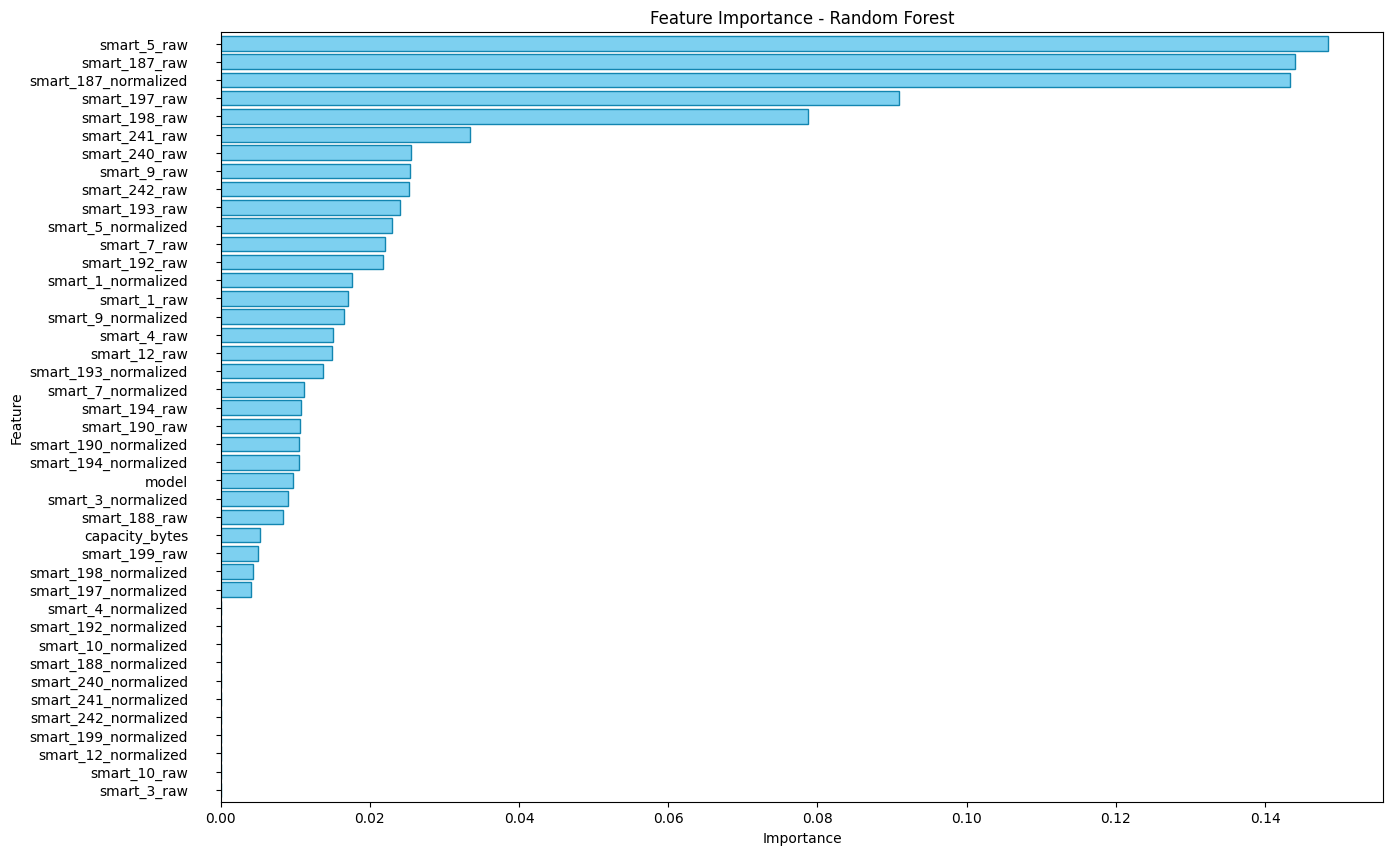

In [144]:
# Train the random forest model
rf_model_2 = RandomForestClassifier(n_estimators=best_n_estimators_0, max_depth=best_max_depth_0, random_state=42)
rf_model_2.fit(X_train_2, y_train_2)

test_predictions_2 = rf_model_2.predict(X_test_2)
cm = confusion_matrix(y_true=y_test_2, y_pred=test_predictions_2)
print(cm)

# Evaluate the model on test set
test_accuracy_2 = rf_model_2.score(X_test_2, y_test_2)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_2)

plt.figure(figsize=(15,10))

feature_importances_2 = pd.Series(rf_model_2.feature_importances_, index=X_train_2.columns)
feature_importances_2.sort_values(ascending=True, inplace=True)
fig = feature_importances_2.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

print(feature_importances_2)

0.8978160714722458


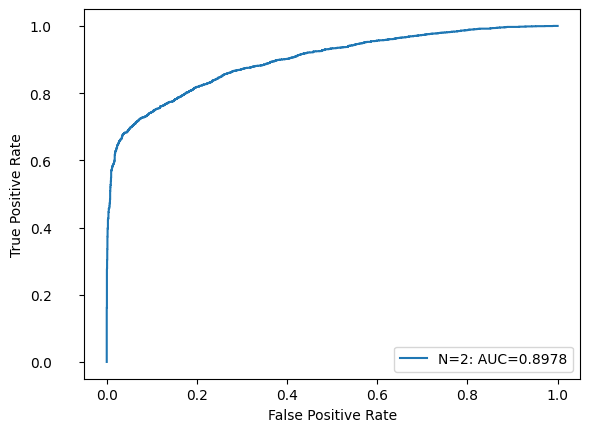

In [145]:
fpr_2, tpr_2, _ = roc_curve(y_test_2, rf_model_2.predict_proba(X_test_2)[:,1])
auc_2 = round(roc_auc_score(y_test_2, rf_model_2.predict_proba(X_test_2)[:,1]), 4)
plt.plot(fpr_2,tpr_2,label="N=2: AUC="+str(auc_2))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_2 = roc_auc_score(y_true=y_test_2, y_score=rf_model_2.predict_proba(X_test_2)[:,1])
print(auroc_score_2)

Day minus 7

[[2419  226]
 [ 849 1878]]
Test Accuracy: 0.7998883097542815
smart_3_raw             0.000000e+00
smart_10_normalized     0.000000e+00
smart_10_raw            0.000000e+00
smart_12_normalized     0.000000e+00
smart_242_normalized    0.000000e+00
smart_241_normalized    0.000000e+00
smart_240_normalized    0.000000e+00
smart_199_normalized    0.000000e+00
smart_188_normalized    2.620093e-07
smart_192_normalized    6.552706e-06
smart_4_normalized      3.904486e-05
smart_198_normalized    2.540813e-03
smart_197_normalized    2.682218e-03
smart_199_raw           4.299520e-03
capacity_bytes          5.916752e-03
smart_188_raw           7.277045e-03
smart_3_normalized      1.106119e-02
model                   1.186119e-02
smart_190_raw           1.288838e-02
smart_190_normalized    1.324580e-02
smart_7_normalized      1.345989e-02
smart_194_normalized    1.347073e-02
smart_194_raw           1.377605e-02
smart_1_normalized      1.640652e-02
smart_193_normalized    1.702744e-02
smart_4_raw   

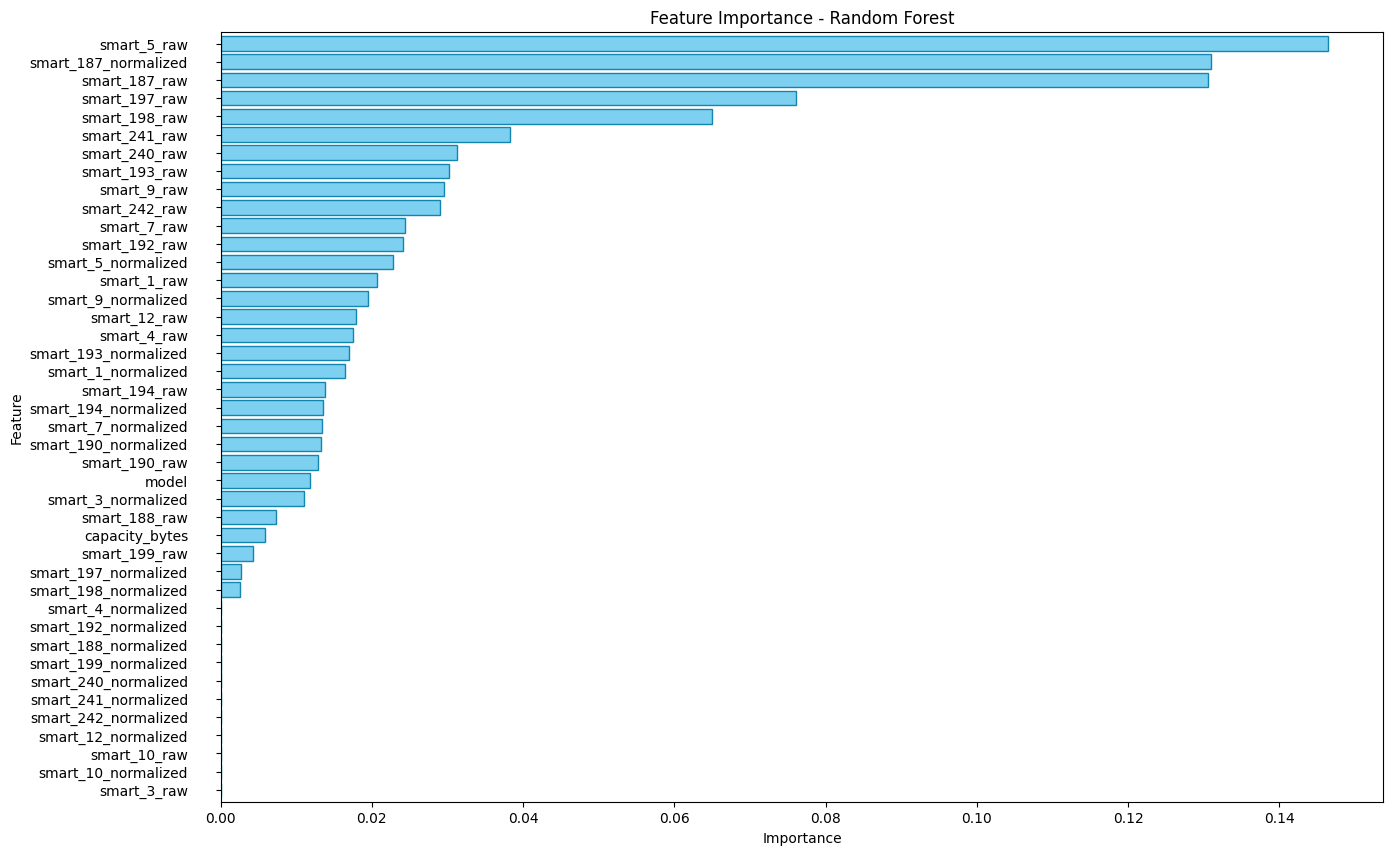

In [146]:
# Train the random forest model
rf_model_7 = RandomForestClassifier(n_estimators=best_n_estimators_0, max_depth=best_max_depth_0, random_state=42)
rf_model_7.fit(X_train_7, y_train_7)

test_predictions_7 = rf_model_7.predict(X_test_7)
cm = confusion_matrix(y_true=y_test_7, y_pred=test_predictions_7)
print(cm)

# Evaluate the model on test set
test_accuracy_7 = rf_model_7.score(X_test_7, y_test_7)
# print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy_7)

plt.figure(figsize=(15,10))

feature_importances_7 = pd.Series(rf_model_7.feature_importances_, index=X_train_7.columns)
feature_importances_7.sort_values(ascending=True, inplace=True)
fig = feature_importances_7.plot.barh(color=[(0.49, 0.816, 0.941)], edgecolor=[(0.071, 0.522, 0.69)], width=0.8, align='center')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")

print(feature_importances_7)

0.8792794591368399


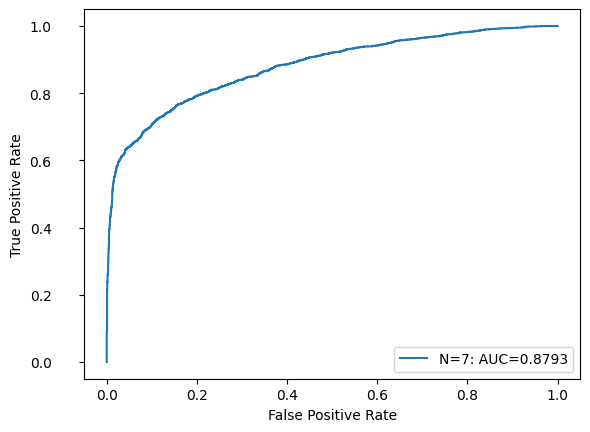

In [147]:
fpr_7, tpr_7, _ = roc_curve(y_test_7, rf_model_7.predict_proba(X_test_7)[:,1])
auc_7 = round(roc_auc_score(y_test_7, rf_model_7.predict_proba(X_test_7)[:,1]), 4)
plt.plot(fpr_7,tpr_7,label="N=7: AUC="+str(auc_7))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

auroc_score_7 = roc_auc_score(y_true=y_test_7, y_score=rf_model_7.predict_proba(X_test_7)[:,1])
print(auroc_score_7)

Plot ROC curves for each lookahead window

Text(0, 0.5, 'True Positive Rate')

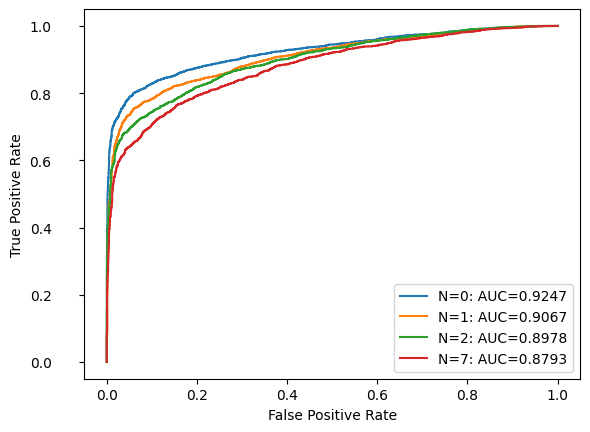

In [148]:
plt.plot(fpr_0,tpr_0,label="N=0: AUC="+str(auc_0))
plt.plot(fpr_1,tpr_1,label="N=1: AUC="+str(auc_1))
plt.plot(fpr_2,tpr_2,label="N=2: AUC="+str(auc_2))
plt.plot(fpr_7,tpr_7,label="N=7: AUC="+str(auc_7))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [149]:
print(auroc_score_0)
print(auroc_score_1)
print(auroc_score_2)
print(auroc_score_7)

0.9246911874356258
0.9066860140640697
0.8978160714722458
0.8792794591368399


In [151]:
from sklearn.model_selection import cross_val_score

cfs_0 = cross_val_score(rf_model_0, X_test_0, y_test_0, cv=5, scoring='roc_auc')
cfs_1 = cross_val_score(rf_model_1, X_test_1, y_test_1, cv=5, scoring='roc_auc')
cfs_2 = cross_val_score(rf_model_2, X_test_2, y_test_2, cv=5, scoring='roc_auc')
cfs_7 = cross_val_score(rf_model_7, X_test_7, y_test_7, cv=5, scoring='roc_auc')

print(f'N=0: AUROC:{cfs_0.mean()}, STD:{cfs_0.std()}, MAX:{cfs_0.max()}, MIN:{cfs_0.min()}')
print(f'N=1: AUROC:{cfs_1.mean()}, STD:{cfs_1.std()}, MAX:{cfs_1.max()}, MIN:{cfs_1.min()}')
print(f'N=2: AUROC:{cfs_2.mean()}, STD:{cfs_2.std()}, MAX:{cfs_2.max()}, MIN:{cfs_2.min()}')
print(f'N=7: AUROC:{cfs_7.mean()}, STD:{cfs_7.std()}, MAX:{cfs_7.max()}, MIN:{cfs_7.min()}')

N=0: AUROC:0.9185263841036427, STD:0.006637376513381922, MAX:0.9263660810206655, MIN:0.909754242207883
N=1: AUROC:0.8975949464225919, STD:0.014197457002343117, MAX:0.9222395077575622, MIN:0.8851852885366671
N=2: AUROC:0.8829844624033486, STD:0.009181997914929563, MAX:0.8938782498104533, MIN:0.8715851003986597
N=7: AUROC:0.8653456590061921, STD:0.006754368559928453, MAX:0.8742408213523873, MIN:0.8555848688173829
